# Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Read data

In [3]:
df1 = pd.read_csv("../data/raw/df_final_demo.txt")
df2 = pd.read_csv("../data/raw/df_final_experiment_clients.txt")
df3 = pd.read_csv("../data/raw/df_final_web_data_pt_1.txt")
df4 = pd.read_csv("../data/raw/df_final_web_data_pt_2.txt")

# Display the first few rows of each dataset
display(df1.head())
display(df2.head())
display(df3.head())
display(df4.head())




,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [6]:
df3




,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [7]:
df4

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [8]:
# Concatenate df3 and df4 along the rows
merged_df = pd.concat([df3, df4], ignore_index=True)
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [9]:
merged_df.to_csv("merged_data.csv", index=False)


In [10]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [11]:
# 'process_step' is the column containing the confirmation status
confirmed_rows = merged_df[merged_df['process_step'] == 'confirm']

# Now, you can access the information of those who have confirmed the process step
confirmed_users = confirmed_rows['client_id']  # Replace 'user_column_name' with the actual name of the column containing user information

# Print or use confirmed_users as needed
print("Users who have confirmed the process step:")
print(confirmed_users)


Users who have confirmed the process step:
8         8320017
13        4033851
14        4033851
15        4033851
24        1982004
           ...   
755362    1462269
755368    9563467
755375    2443347
755376    9895983
755384    9668240
Name: client_id, Length: 102963, dtype: int64


# Combining all the dataframe

In [12]:

# combining df1 and df2 first
merged_df1 = pd.merge(df1, df2, on='client_id')

# Merge merged_df1 with merged_df
final_merged_df = pd.merge(merged_df1, merged_df, on='client_id')


In [13]:
final_merged_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,NaN,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32


In [14]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449831 entries, 0 to 449830
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         449831 non-null  int64  
 1   clnt_tenure_yr    449716 non-null  float64
 2   clnt_tenure_mnth  449716 non-null  float64
 3   clnt_age          449704 non-null  float64
 4   gendr             449716 non-null  object 
 5   num_accts         449716 non-null  float64
 6   bal               449716 non-null  float64
 7   calls_6_mnth      449716 non-null  float64
 8   logons_6_mnth     449716 non-null  float64
 9   Variation         321309 non-null  object 
 10  visitor_id        449831 non-null  object 
 11  visit_id          449831 non-null  object 
 12  process_step      449831 non-null  object 
 13  date_time         449831 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 48.0+ MB


# Data cleaning

In [15]:
# Handle missing values
final_merged_df.isnull().sum()

client_id                0
clnt_tenure_yr         115
clnt_tenure_mnth       115
clnt_age               127
gendr                  115
num_accts              115
bal                    115
calls_6_mnth           115
logons_6_mnth          115
Variation           128522
visitor_id               0
visit_id                 0
process_step             0
date_time                0
dtype: int64

In [16]:
# Impute missing values with the median of the respective column(Numerical variable)
median_imputation_columns = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
for column in median_imputation_columns:
    final_merged_df[column] = final_merged_df[column].fillna(final_merged_df[column].mean())


In [17]:
final_merged_df.isnull().sum()

client_id                0
clnt_tenure_yr           0
clnt_tenure_mnth         0
clnt_age                 0
gendr                  115
num_accts                0
bal                      0
calls_6_mnth             0
logons_6_mnth            0
Variation           128522
visitor_id               0
visit_id                 0
process_step             0
date_time                0
dtype: int64

In [18]:
# Impute missing values in the "gendr" column with the mode
final_merged_df['gendr'] = final_merged_df['gendr'].fillna(final_merged_df['gendr'].mode()[0])
# Impute missing values in the "Variation" column with the mode
final_merged_df['Variation'] = final_merged_df['Variation'].fillna(final_merged_df['Variation'].mode()[0])


In [19]:
# After handling missing values,checking for it
final_merged_df.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
Variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [20]:
# checking for duplicates
final_merged_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
449826    False
449827    False
449828    False
449829    False
449830    False
Length: 449831, dtype: bool

In [21]:
# string formatting
# Rename columns using a dictionary to map old names to new names
final_merged_df.rename(columns={'clnt_tenure_yr': 'client_tenure_year', 'clnt_tenure_mnth': 'client_tenure_month', 'clnt_age': 'client_age', 'gendr': 'gender', 'num_accts': 'number_of_accounts', 'bal': 'balance', 'calls_6_mnth': 'calls_6_months', 'logons_6_mnth': 'logons_6_months'}, inplace=True)


In [22]:
final_merged_df

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_months,logons_6_months,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32


In [23]:
# saving cleaned dataset
final_merged_df.to_csv("../data/clean/final_merged_df.csv", index=False)

# Loading cleaned dataset

In [24]:
df=pd.read_csv("../data/clean/final_merged_df.csv")

In [25]:
df

,client_id,client_tenure_year,client_tenure_month,client_age,gender,number_of_accounts,balance,calls_6_months,logons_6_months,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449826,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02
449827,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07
449828,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10
449829,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,Test,962766819_57063135389,884309593_49820690623_654151,step_1,2017-04-05 11:41:32


# splitting the datasets into two

In [29]:

import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Variation'])
y = df['Variation']

# Split the dataset using stratified sampling (80% control, 20% test)
X_control, X_test, y_control, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Get the client IDs for control and test sets
control_client_ids = X_control['client_id']
test_client_ids = X_test['client_id']

# Print or use the client IDs for control and test sets
print("Client IDs for Control Set:")
print(control_client_ids)

print("\nClient IDs for Test Set:")
print(test_client_ids)


Client IDs for Control Set:
12737     8518108
172467    8210226
171360    2800558
174718    2274658
443515    4216841
           ...   
161294    7613190
224176    5280680
191175    2641426
196721    9594093
12452     2970159
Name: client_id, Length: 359864, dtype: int64

Client IDs for Test Set:
153184    5041136
277055    1346422
324306    6284354
335635    6023074
189327      68886
           ...   
344327    4501536
315427    9493430
276085    7833565
289427    2740069
207111    4138042
Name: client_id, Length: 89967, dtype: int64


In [40]:


# Client IDs for Control Set
control_client_ids_df = pd.DataFrame({'client_id': control_client_ids.values.flatten()})

# Client IDs for Test Set
test_client_ids_df = pd.DataFrame({'client_id': test_client_ids.values.flatten()})

# Save client IDs to CSV files
control_client_ids_df.to_csv('../data/clean/control_client_ids.csv', index=False)
test_client_ids_df.to_csv('../data/clean/test_client_ids.csv', index=False)



In [41]:
control_client_ids

,client_id
12737,8518108
172467,8210226
171360,2800558
174718,2274658
443515,4216841
...,...
161294,7613190
224176,5280680
191175,2641426
196721,9594093


In [42]:
test_client_ids

,client_id
153184,5041136
277055,1346422
324306,6284354
335635,6023074
189327,68886
...,...
344327,4501536
315427,9493430
276085,7833565
289427,2740069


In [43]:
# Sort the DataFrame by the 'Age' column
sorted_df = final_merged_df.sort_values(by='Variation')

# Print the sorted DataFrame
print(sorted_df)

        client_id  client_tenure_year  client_tenure_month  client_age gender  \
224915    6754992                18.0                216.0        35.5      F   
173960    6929927                 6.0                 76.0        55.5      U   
173961    6929927                 6.0                 76.0        55.5      U   
173970    1432979                14.0                169.0        35.5      F   
173971    1432979                14.0                169.0        35.5      F   
...           ...                 ...                  ...         ...    ...   
191817    7091126                12.0                147.0        57.0      F   
191816    1114749                 5.0                 60.0        50.5      F   
191815    1114749                 5.0                 60.0        50.5      F   
191822    7091126                12.0                147.0        57.0      F   
449830    5602139                21.0                254.0        59.5      F   

        number_of_accounts 

In [45]:
# Split the dataset based on the 'Variation' column values
control_set = final_merged_df[final_merged_df['Variation'] == 'Control']
test_set = final_merged_df[final_merged_df['Variation'] == 'Test']

# Display the resulting subsets
print("Control Set:")
print(control_set)

print("\nTest Set:")
print(test_set)

Control Set:
        client_id  client_tenure_year  client_tenure_month  client_age gender  \
11        2304905                 7.0                 94.0        58.0      U   
12        2304905                 7.0                 94.0        58.0      U   
13        2304905                 7.0                 94.0        58.0      U   
14        2304905                 7.0                 94.0        58.0      U   
15        2304905                 7.0                 94.0        58.0      U   
...           ...                 ...                  ...         ...    ...   
321283    6967120                21.0                260.0        68.5      M   
321284    6967120                21.0                260.0        68.5      M   
321285    6967120                21.0                260.0        68.5      M   
321286    6967120                21.0                260.0        68.5      M   
321287    6967120                21.0                260.0        68.5      M   

        number

In [46]:
# Save control set to CSV
control_set.to_csv('../data/clean/control_set.csv', index=False)

# Save test set to CSV
test_set.to_csv('../data/clean/test_set.csv', index=False)

In [48]:
control_set.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 143462 entries, 11 to 321287
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   client_id            143462 non-null  int64  
 1   client_tenure_year   143462 non-null  float64
 2   client_tenure_month  143462 non-null  float64
 3   client_age           143462 non-null  float64
 4   gender               143462 non-null  object 
 5   number_of_accounts   143462 non-null  float64
 6   balance              143462 non-null  float64
 7   calls_6_months       143462 non-null  float64
 8   logons_6_months      143462 non-null  float64
 9   Variation            143462 non-null  object 
 10  visitor_id           143462 non-null  object 
 11  visit_id             143462 non-null  object 
 12  process_step         143462 non-null  object 
 13  date_time            143462 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 16.4+ MB


In [49]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 306369 entries, 0 to 449830
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   client_id            306369 non-null  int64  
 1   client_tenure_year   306369 non-null  float64
 2   client_tenure_month  306369 non-null  float64
 3   client_age           306369 non-null  float64
 4   gender               306369 non-null  object 
 5   number_of_accounts   306369 non-null  float64
 6   balance              306369 non-null  float64
 7   calls_6_months       306369 non-null  float64
 8   logons_6_months      306369 non-null  float64
 9   Variation            306369 non-null  object 
 10  visitor_id           306369 non-null  object 
 11  visit_id             306369 non-null  object 
 12  process_step         306369 non-null  object 
 13  date_time            306369 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 35.1+ MB


In [54]:
# Sort the control set by 'client_id', 'visit_id', 'process_step', and 'date_time'
control_set_sorted = control_set.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

# Sort the test set by 'client_id', 'visit_id', 'process_step', and 'date_time'
test_set_sorted = test_set.sort_values(by=['client_id', 'visit_id', 'process_step', 'date_time'])

# Save the sorted control set to CSV
control_set_sorted.to_csv('../data/clean/control_set_sorted.csv', index=False)

# Save the sorted test set to CSV
test_set_sorted.to_csv('../data/clean/test_set_sorted.csv', index=False)

C:\Users\mohan\AppData\Local\Temp\ipykernel_7612\360743882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=final_merged_df, palette='Set2')


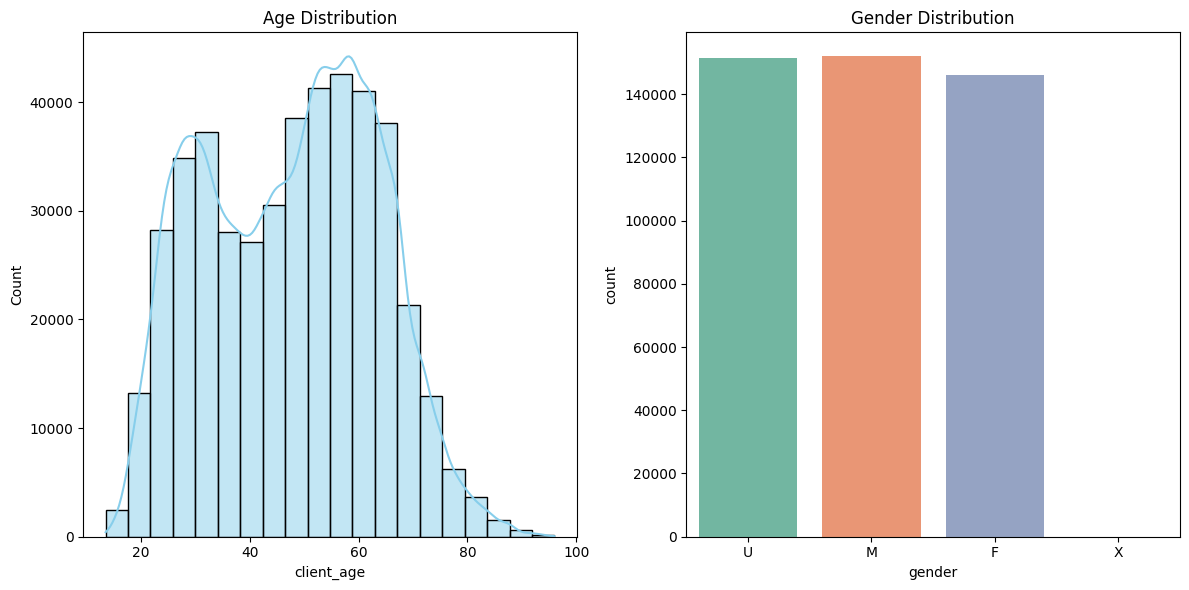

In [57]:
# Explore demographic variables
plt.figure(figsize=(12, 6))

# Plot for Age distribution
plt.subplot(1, 2, 1)
sns.histplot(final_merged_df['client_age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

# Plot for Gender distribution
plt.subplot(1, 2, 2)
sns.countplot(x='gender', data=final_merged_df, palette='Set2')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

Age Statistics:
 count    449831.000000
mean         47.653966
std          15.739867
min          13.500000
25%          33.500000
50%          49.000000
75%          60.000000
max          96.000000
Name: client_age, dtype: float64

Tenure Statistics:
 count    449831.000000
mean         12.234130
std           7.004288
min           2.000000
25%           6.000000
50%          11.000000
75%          16.000000
max          62.000000
Name: client_tenure_year, dtype: float64


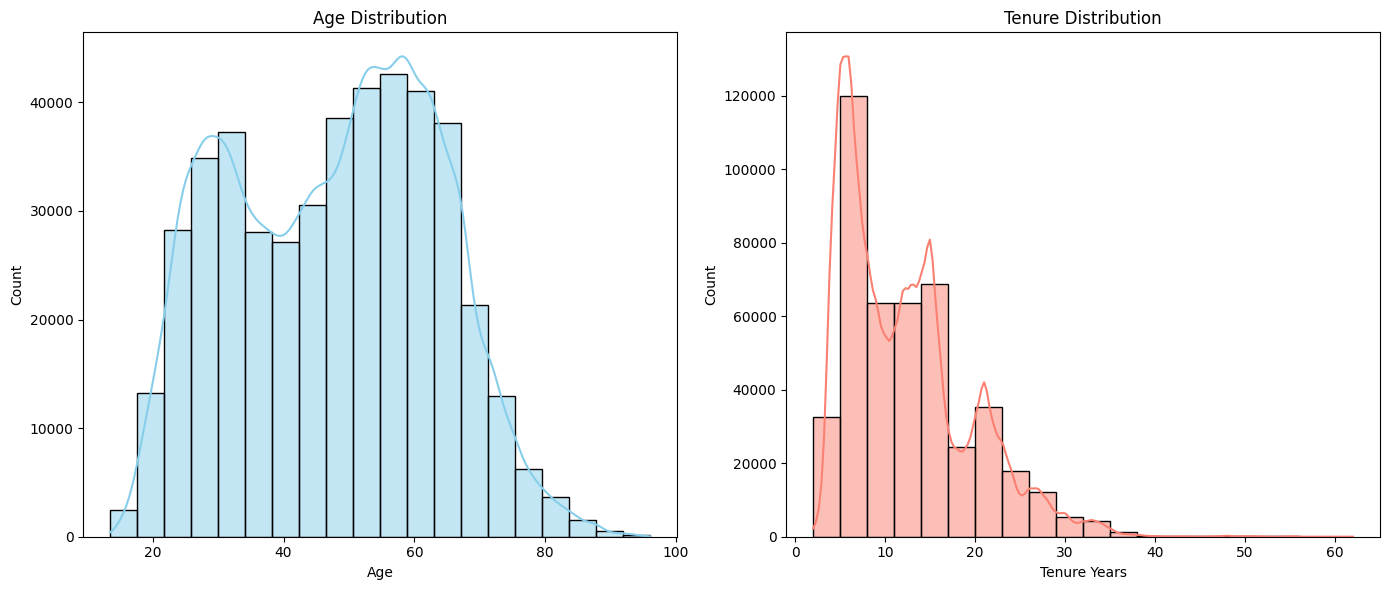

In [61]:
# Step 1: Calculate Descriptive Statistics
age_stats = final_merged_df['client_age'].describe()
tenure_stats = final_merged_df['client_tenure_year'].describe()

print("Age Statistics:\n", age_stats)
print("\nTenure Statistics:\n", tenure_stats)

# Step 2: Visualize the Distribution
plt.figure(figsize=(14, 6))

# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(final_merged_df['client_age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# Histogram for Tenure
plt.subplot(1, 2, 2)
sns.histplot(final_merged_df['client_tenure_year'], bins=20, kde=True, color='salmon')
plt.title('Tenure Distribution')
plt.xlabel('Tenure Years')

plt.tight_layout()
plt.show()

# Completion rate of the users(Control dataset)

In [63]:

# Load your dataset into a DataFram
df = pd.read_csv('../data/clean/control_set.csv')

# Step 1: Identify Users Who Reached the 'Confirm' Step
confirm_users = control_set[control_set['process_step'] == 'confirm']['client_id'].unique()

# Step 2: Calculate the Number of Users Who Reached the 'Confirm' Step
num_confirm_users = len(confirm_users)

# Step 3: Calculate the Total Number of Users
total_users = len(df['client_id'].unique())

# Step 4: Calculate the Completion Rate
completion_rate = num_confirm_users / total_users

print("Completion Rate:", completion_rate)


Completion Rate: 0.6558728539860615


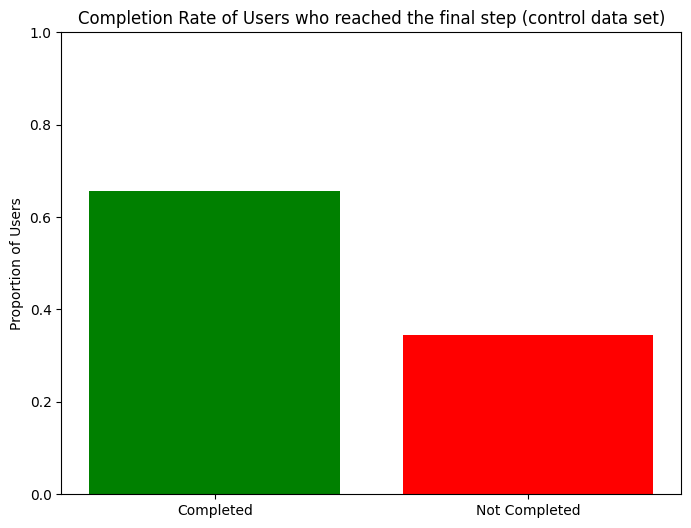

In [66]:
# Plotting the Completion Rate
labels = ['Completed', 'Not Completed']
values = [completion_rate, 1 - completion_rate]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Completion Rate of Users who reached the final step (control data set)')
plt.ylabel('Proportion of Users')
plt.ylim(0, 1)
plt.show()

# Completion rate of the users(Test dataset)

In [67]:
# Load your dataset into a DataFram
df = pd.read_csv('../data/clean/test_set.csv')

# Step 1: Identify Users Who Reached the 'Confirm' Step
confirm_users = control_set[control_set['process_step'] == 'confirm']['client_id'].unique()

# Step 2: Calculate the Number of Users Who Reached the 'Confirm' Step
num_confirm_users = len(confirm_users)

# Step 3: Calculate the Total Number of Users
total_users = len(df['client_id'].unique())

# Step 4: Calculate the Completion Rate
completion_rate = num_confirm_users / total_users

print("Completion Rate:", completion_rate)

Completion Rate: 0.3278458695328929


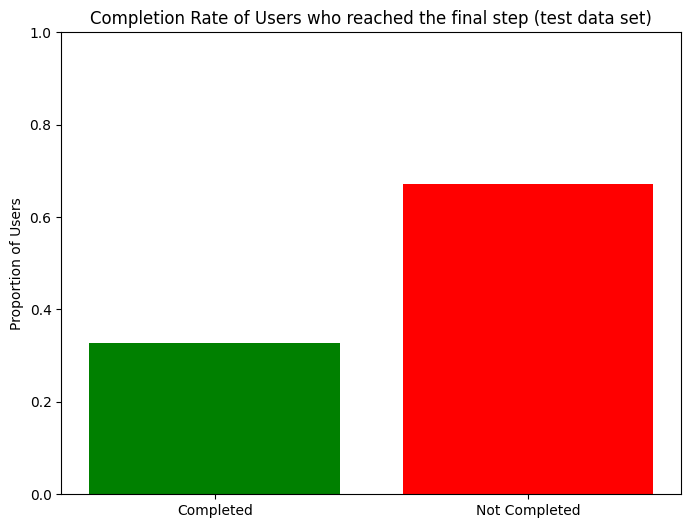

In [68]:
# Plotting the Completion Rate
labels = ['Completed', 'Not Completed']
values = [completion_rate, 1 - completion_rate]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Completion Rate of Users who reached the final step (test data set)')
plt.ylabel('Proportion of Users')
plt.ylim(0, 1)
plt.show()